# Analysis of parking violations in New York City-2


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import datetime
from IPython.display import Image
from sqlalchemy import create_engine
import sqlite3
import csv
import time
import matplotlib.patches as mpatches

In [2]:
%matplotlib inline

# Parking tickets in New York City

##  About this Dataset

                * Data Last Updated       August 9, 2017
                * Metadata Last Updated:  December 21, 2017
                * Date Created:           August 3, 2017

                * Data Provided by        Department of Finance (DOF)
                * Dataset Owner           NYC OpenData
    
                * Rows                    10.8M
                * Columns                 43


### Columns in this Dataset  
|**Column Name**             |**Type** |
|:----------------------:|:-------:|
|Summons Number          |Number   |
|Plate ID                |Plain Text|
|Registration State|Plain Text|
|Violation Code|Number|
|...............|..........|
|Street Name|Plain Text|
|Intersecting Street|Plain Text|
|...............|..........|
|Hydrant Violation|Plain Text|
|Double Parking Violation|Plain Text|



## website for data:  
https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2017/2bnn-yakx


In [3]:
file='E:\\DS18\\datacamp\\NYC\\ParkingViolations2017.csv'

In [4]:
print(pd.read_csv(file, nrows=5))

   Summons Number Plate ID Registration State Plate Type  Issue Date  \
0      5092469481  GZH7067                 NY        PAS  07/10/2016   
1      5092451658  GZH7067                 NY        PAS  07/08/2016   
2      4006265037  FZX9232                 NY        PAS  08/23/2016   
3      8478629828  66623ME                 NY        COM  06/14/2017   
4      7868300310  37033JV                 NY        COM  11/21/2016   

   Violation Code Vehicle Body Type Vehicle Make Issuing Agency  Street Code1  \
0               7              SUBN        TOYOT              V             0   
1               7              SUBN        TOYOT              V             0   
2               5              SUBN         FORD              V             0   
3              47              REFG        MITSU              T         10610   
4              69              DELV        INTER              T         10510   

            ...             Vehicle Color  Unregistered Vehicle?  \
0           

In [5]:
connex = sqlite3.connect("Parking2017-1.db")  # Opens file if exists, else creates file
cur = connex.cursor()  # This object lets us actually send messages to our DB and receive results

In [6]:
start = time.time()
sql = "SELECT SummonsNumber,RegistrationState,IssueDate, VehicleColor, ViolationTime, StreetName FROM 'table' ;"
df = pd.read_sql_query(sql, connex)

print(df.head(10))
print(df.info())

end = time.time()
elapsed = end - start
print(elapsed)

   SummonsNumber RegistrationState   IssueDate VehicleColor ViolationTime  \
0     5092469481                NY  07/10/2016           GY         0143A   
1     5092451658                NY  07/08/2016           GY         0400P   
2     4006265037                NY  08/23/2016           BK         0233P   
3     8478629828                NY  06/14/2017           WH         1120A   
4     7868300310                NY  11/21/2016        WHITE         0555P   
5     5096917368                NY  06/13/2017           WH         0852P   
6     1413609545                NJ  08/03/2016        WHITE         0215A   
7     4628525523                MA  12/21/2016         None         0758A   
8     4627113330                NY  11/21/2016           BK         1005A   
9     4006478550                VA  10/05/2016          BLK         0845A   

             StreetName  
0  ALLERTON AVE (W/B) @  
1  ALLERTON AVE (W/B) @  
2  SB WEBSTER AVE @ E 1  
3               7th Ave  
4               6th Av

In [7]:
n=df['VehicleColor'].unique()

print(n)

['GY' 'BK' 'WH' ... 'O/' 'GRAEY' 'GIKD']


In [8]:
n=df['RegistrationState'].unique()
n.sort()
print(n)

['99' 'AB' 'AK' 'AL' 'AR' 'AZ' 'BC' 'CA' 'CO' 'CT' 'DC' 'DE' 'DP' 'FL'
 'FO' 'GA' 'GV' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MB' 'MD'
 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'MX' 'NB' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM'
 'NS' 'NT' 'NV' 'NY' 'OH' 'OK' 'ON' 'OR' 'PA' 'PE' 'PR' 'QB' 'RI' 'SC'
 'SD' 'SK' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


+ Registration states shown above seems coming from US and Canada. For states information for USA and Canada, here is the list: https://www.ups.com/worldshiphelp/WS16/ENU/AppHelp/SHIPUPS.htm#Codes/State_Province_Codes.htm  +

### Cleanup the data by removal of NaN or meaningless values
In the Registration State column,there are '99' and 'DP' that are not identified places and needed to be removed.

In [9]:
new=df[df['StreetName'].notnull()]
new=new[new['ViolationTime'].notnull()]
new=new[new['IssueDate'].notnull()]
new=new[new['RegistrationState'].notnull()]
new=new[new['RegistrationState']!='99']
new=new[new['RegistrationState']!='DP'] 
#remove 'DP' since cannot find what DP stands for
new=new[new['SummonsNumber'].notnull()]
print(new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10759649 entries, 0 to 10803027
Data columns (total 6 columns):
SummonsNumber        int64
RegistrationState    object
IssueDate            object
VehicleColor         object
ViolationTime        object
StreetName           object
dtypes: int64(1), object(5)
memory usage: 574.6+ MB
None


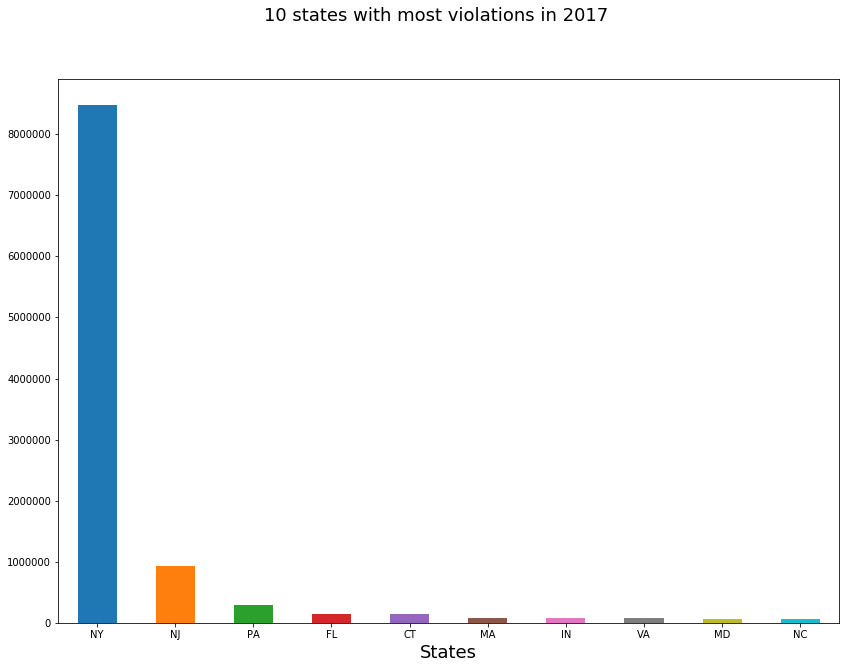

In [10]:
rank_st = new['RegistrationState'].value_counts()
rank_st.sort_values(ascending=False)
top10 = rank_st[0:10]
fig = plt.figure(figsize=(14, 10))

fig.suptitle('10 states with most violations in 2017', fontsize=18)
plt.xlabel('States', fontsize=18)
top10.plot(kind="bar",rot=0)

From the figure above, it is shown that most tickets issued are cars from local New York. The second most is from New Jersey which is 3 times more than the third state-Pennsylvania. This is very insightful for police in New York City to take measures to reduce the traffic inflow from New Jersey such as imposing higher fees for toll roads leading to New York City.  

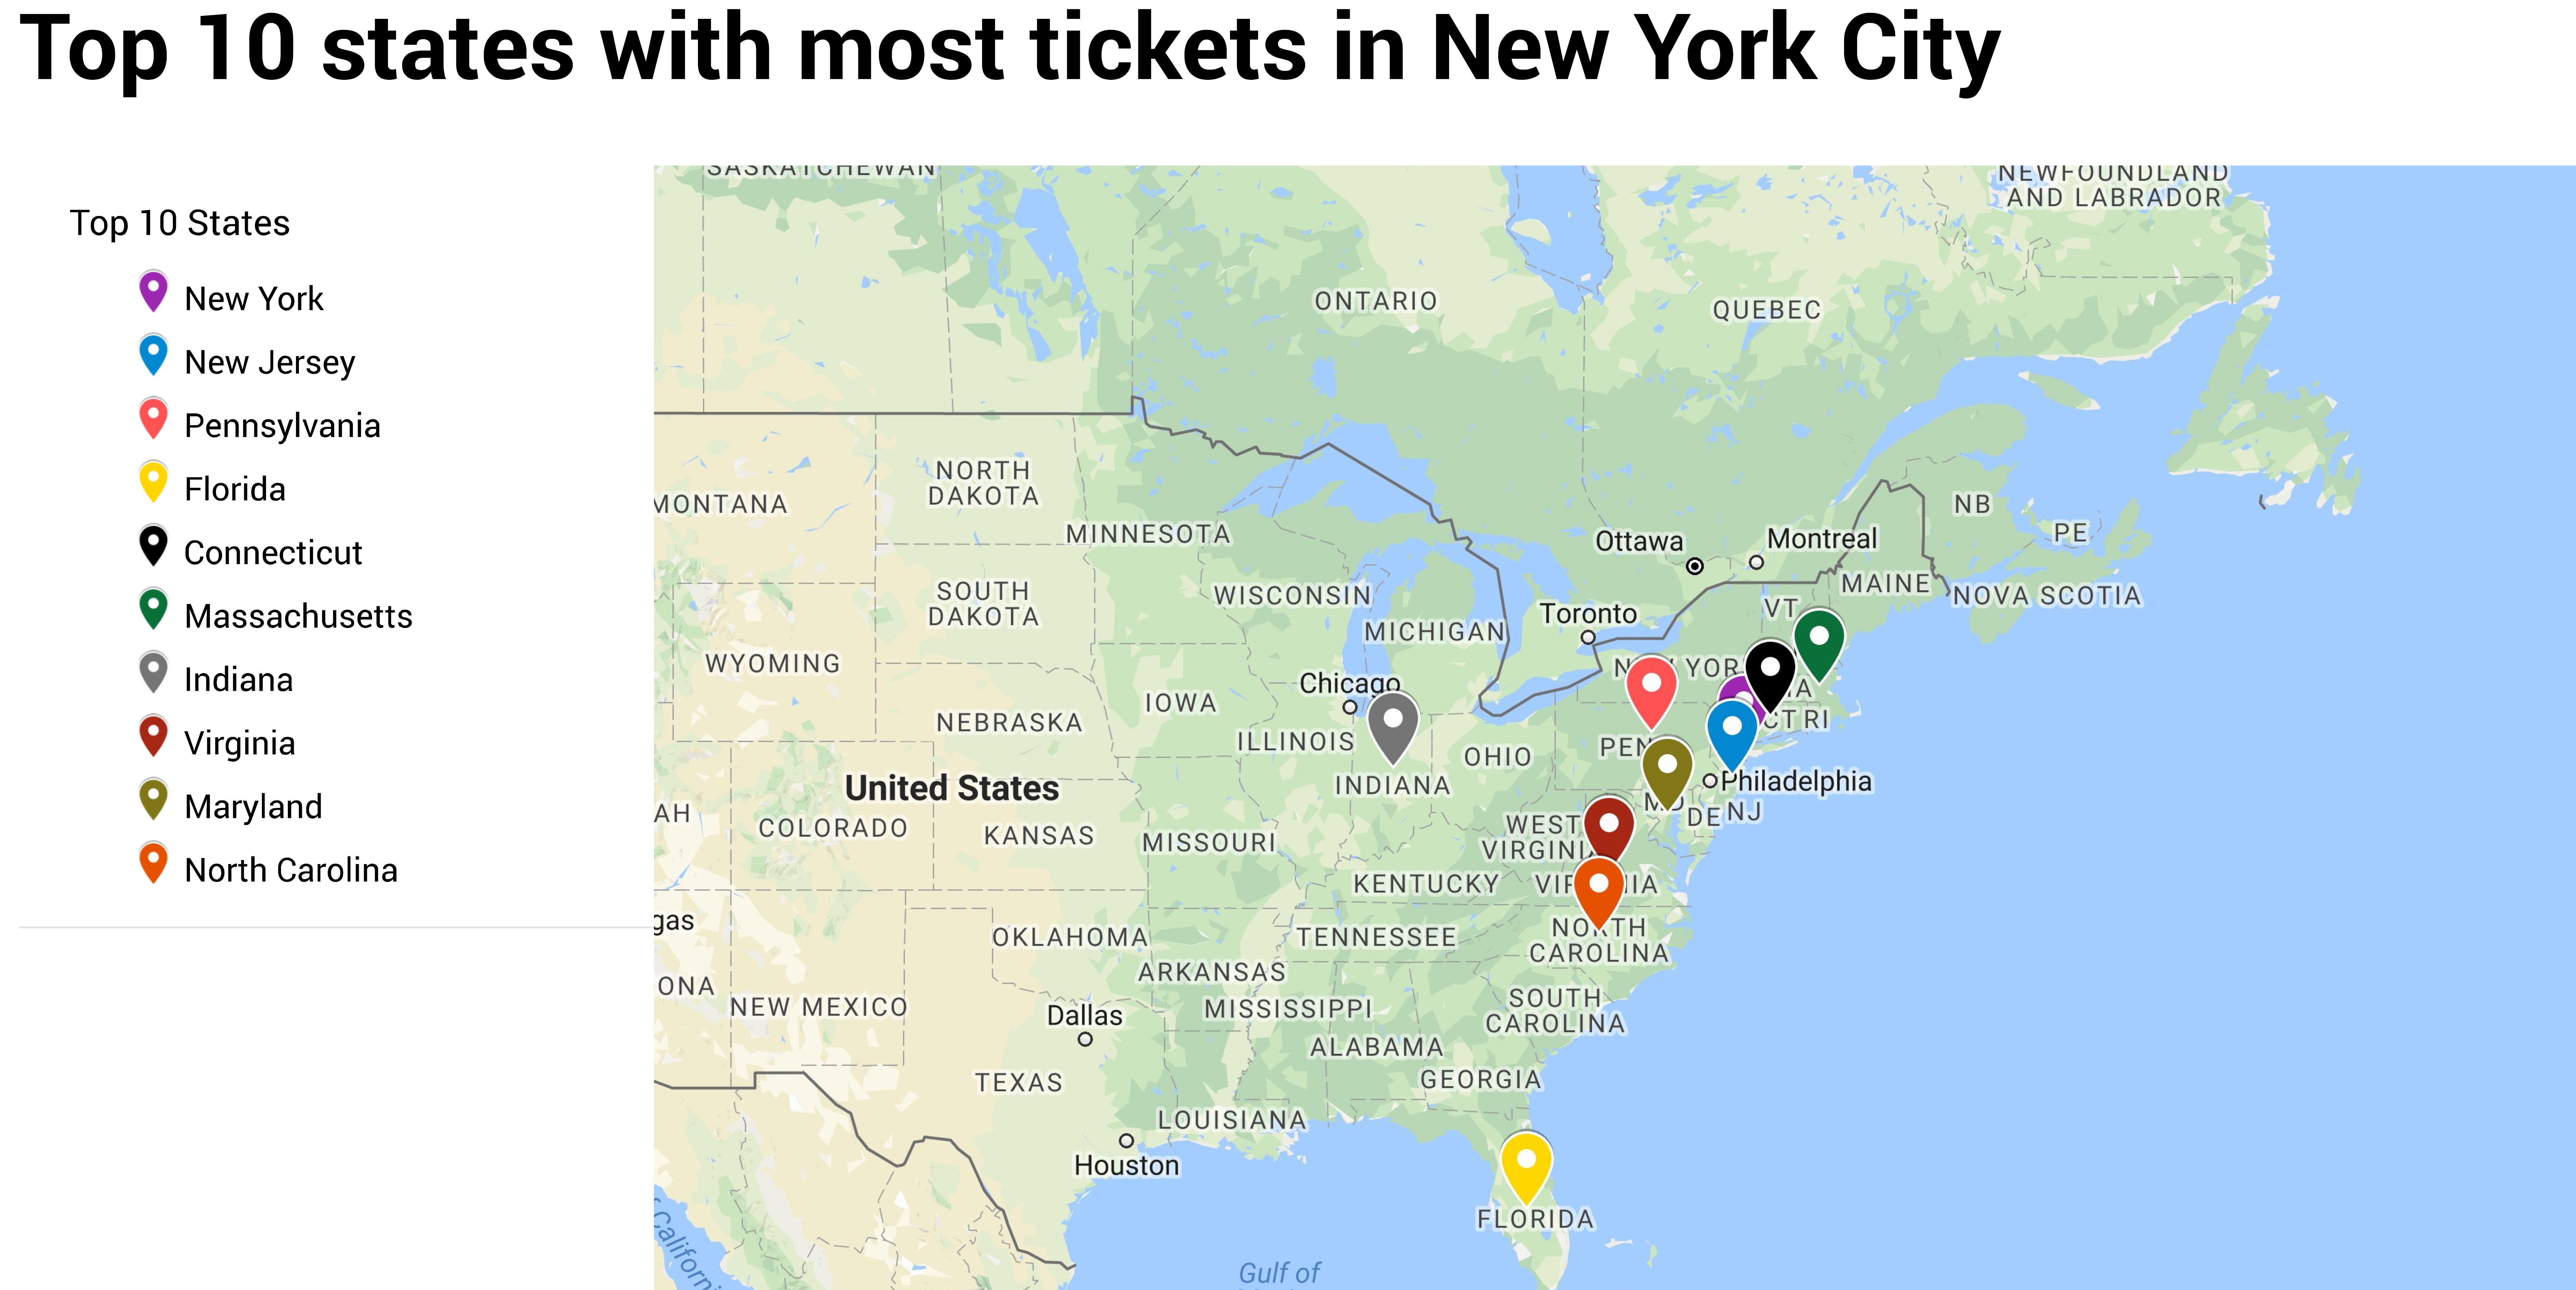

In [11]:
Image(filename="C:\\Users\\VT\\Datacamp\\10_most_ states.jpg")

The map shows that the Florida is pretty far from New York City with the 4th most parking tickets issued, which raises the question: **Why Does Florida people love visit New York city than any other long distance states?** 

In [12]:
State_rank=pd.DataFrame({'Code':rank_st.index, 'Violations':rank_st.values},dtype='float64')
Places=pd.read_csv('C:\\Users\VT\Datacamp\\USCA_states.csv',header=0)  #names=['Place','Code','Distance']

State_rank.sort_values('Code',inplace=True, ascending=True)
State_rank.set_index('Code', inplace=True)
Places.set_index('Code', inplace=True)
 
Places['Violations']=State_rank[State_rank.index == Places.index]['Violations'].astype('float64')

                          Place  Distance    Population  Violations
Code                                                               
AB                  Alberta, CA      2597  4.150000e+06       218.0
AK                   Alaska, US      4338  7.397950e+05       754.0
AL                  Alabama, US      1054  4.880000e+06      6887.0
AR                 Arkansas, US      1211  3.000000e+06      2620.0
AZ                  Arizona, US      2333  7.020000e+06     26416.0
BC         British Columbia, CA      3100  4.630000e+06       127.0
CA               California, US      2901  3.950000e+07     24248.0
CO                 Colorado, US      1849  5.610000e+06      4092.0
CT              Connecticut, US        97  3.590000e+06    141041.0
DC     District of Columbia, US       225  6.940000e+05      4248.0
DE                 Delaware, US       188  9.620000e+05     16319.0
FL                  Florida, US      1143  2.100000e+07    144493.0
FO                Faroe Islands      4537  4.910

(0.0, 10000000.0)

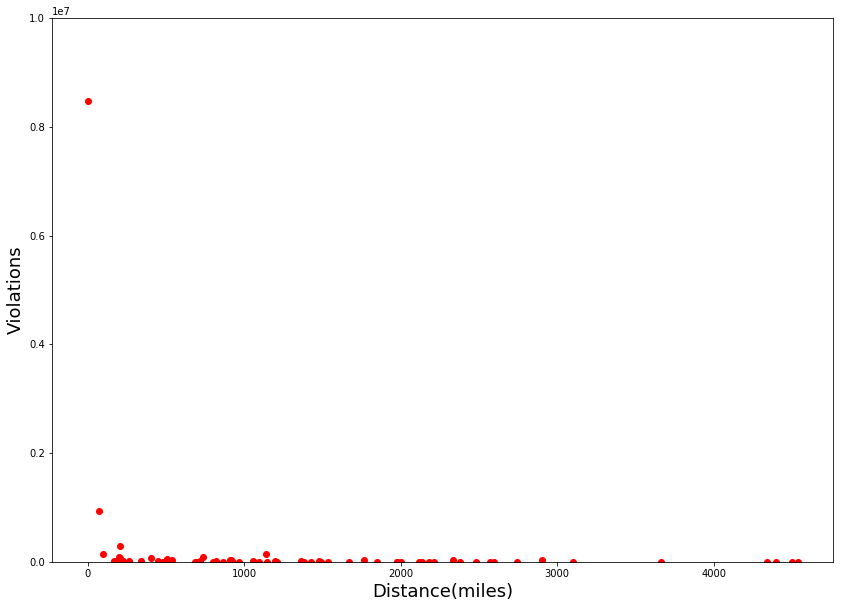

In [13]:
print(Places)
fig = plt.figure(figsize=(14, 10))
plt.scatter(Places['Distance'], Places['Violations'],color='Red')
plt.xlabel('Distance(miles)', fontsize=18)
plt.ylabel('Violations', fontsize=18)
#plt.xlim(0.00001,0.015)
plt.ylim(0.,1.0e7)

Above figure tells us that distance is proximately inversely proportional to the number of violations(parking tickests issued). Therefore we are to plot violations vs 1/(distance), in order to implement this, the new york needs to be removed froom dataset since the distance is zero. 

C:\Users\VT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:             Violations   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     78.58
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           1.27e-12
Time:                        20:03:01   Log-Likelihood:                -813.50
No. Observations:                  64   AIC:                             1631.
Df Residuals:                      62   BIC:                             1635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.043e+04   1.26e+04     -2.411      0.0

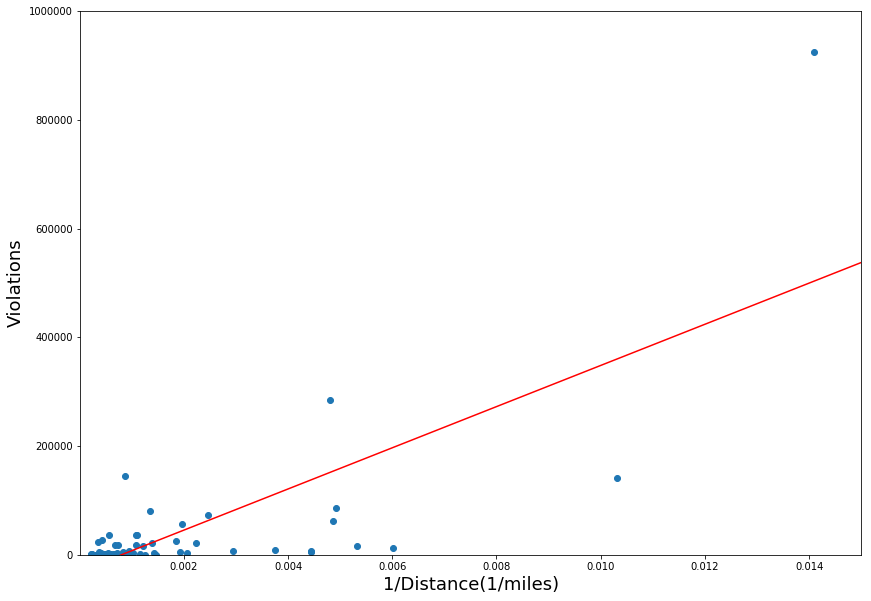

In [14]:
import statsmodels.api as sm # import statsmodels 
fig = plt.figure(figsize=(14, 10))
Places=Places[Places.index!='NY']
plt.scatter(1/Places['Distance'], Places['Violations'])
plt.xlim(0.00001,0.015)
plt.ylim(0.,1.0e6)
plt.xlabel('1/Distance(1/miles)', fontsize=18)
plt.ylabel('Violations', fontsize=18)


Places['inv_dis']=1.0/Places['Distance']
X = Places['inv_dis'] ## X usually means our input variables (or independent variables)
y = Places['Violations'] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

X_plot = np.linspace(0.0,0.015,100)
plt.plot(X_plot, X_plot*model.params[1] + model.params[0], color='red')

plt.show() 

Figure showes that a linear trend.Therefore it is feasible to do linear regression. 

R-squared: 0.559 meaning 55.9% variance was explained by this linear model. 

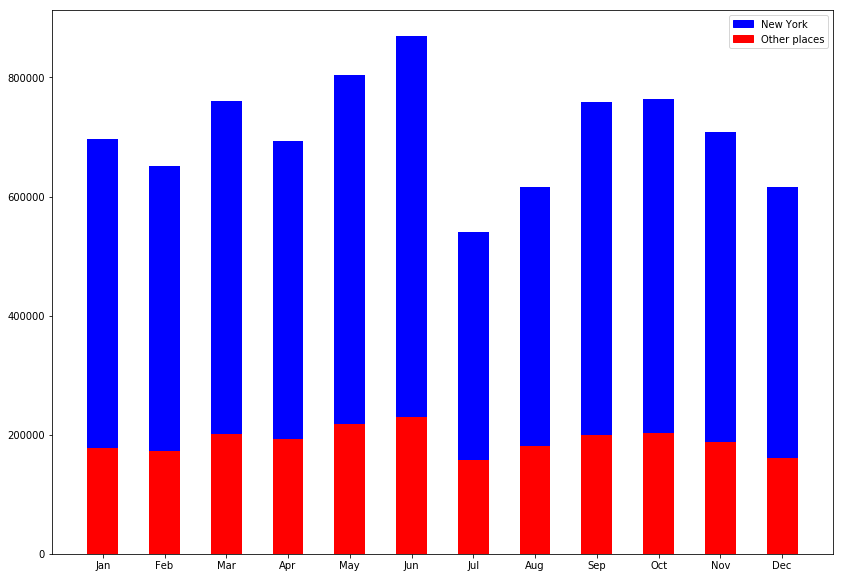

In [15]:

new['month'] = pd.to_datetime(new['IssueDate'],format='%m/%d/%Y').dt.month
top1=new.loc[new['RegistrationState']=='NY']
#print(new.head())
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
num_NY=top1.groupby(['month'])['month'].count()

top_other=new.loc[new['RegistrationState']!='NY']
num_other=top_other.groupby(['month'])['month'].count()

plt.figure(figsize=(14,10))
plt.bar(num_NY.index , num_NY, color = 'b', width = 0.5) # plotting the graph
plt.bar(num_other.index , num_other, color = 'r', width = 0.5) # plotting the graph
plt.xticks(num_NY.index, labels, rotation=0) #providing xticks to the graph

blue_patch=mpatches.Patch(color='b',label='New York') 
red_patch=mpatches.Patch(color='r',label='Other places')
plt.legend(handles=[blue_patch,red_patch]) #providing the labels



Above figure indicates that tickets for 12 months have similar pattern for New York city as the other places, i.e., June is the highest month and July is least month. For each month, tickets for New York city drivers are more than those for other cities combined. 

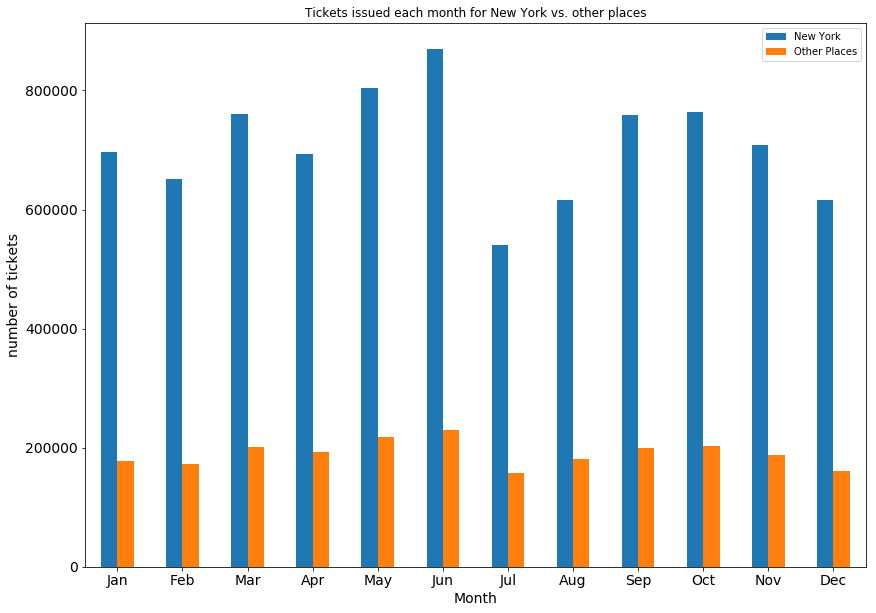

In [16]:
df = pd.DataFrame({
              'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
              'New York':num_NY.values,
              'Other Places':num_other.values}
             )
df = df.set_index(['month'])
#print(df)
ax = df.plot(kind='bar', title ="Tickets issued each month for New York vs. other places", figsize=(14, 10), legend=True,rot=0, fontsize=14)
ax.set_xlabel("Month", fontsize=14,rotation=0)
ax.set_ylabel("number of tickets", fontsize=14,rotation=90)
plt.show()

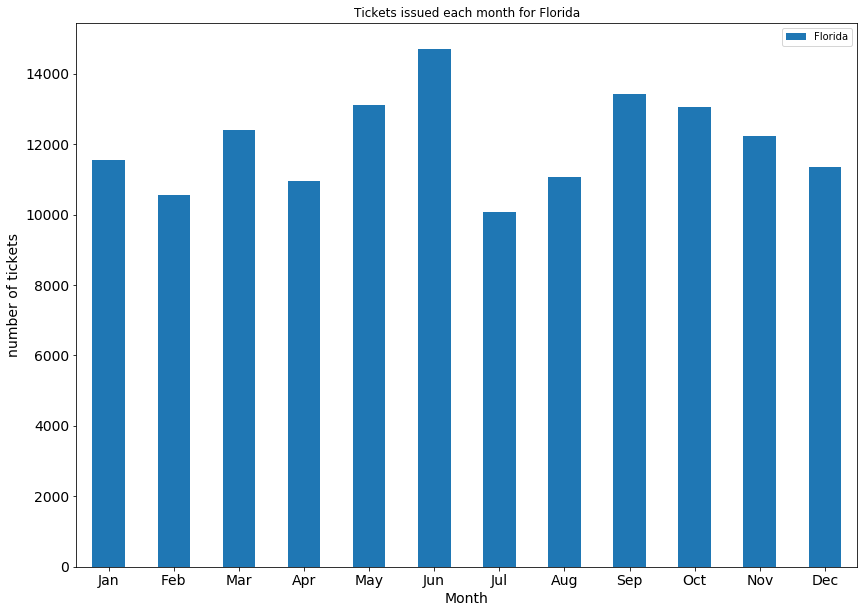

In [17]:
FL=new.loc[new['RegistrationState']=='FL']
#print(new.head())
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
num_FL=FL.groupby(['month'])['month'].count()
df = pd.DataFrame({
              'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
              'Florida':num_FL.values}
             )
df = df.set_index(['month'])
#print(df)
ax = df.plot(kind='bar', title ="Tickets issued each month for Florida", figsize=(14, 10), legend=True,rot=0, fontsize=14)
ax.set_xlabel("Month", fontsize=14,rotation=0)
ax.set_ylabel("number of tickets", fontsize=14,rotation=90)
plt.show()

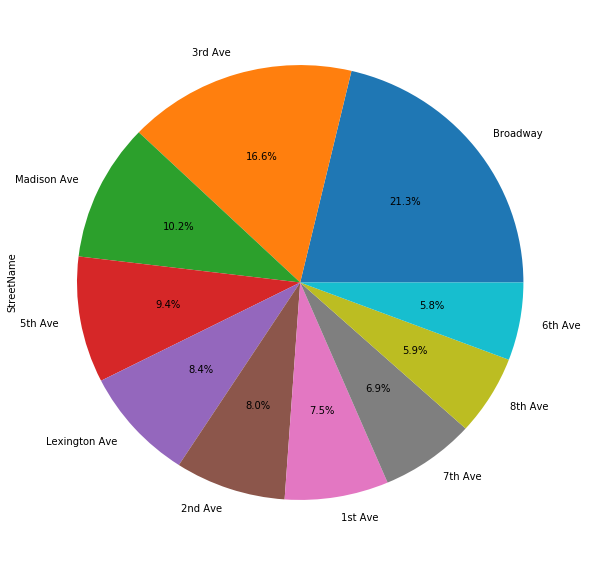

In [18]:
rank_street = new['StreetName'].value_counts()
rank_street.sort_values(ascending=False)
#top10 = rank_street[0:10]
fig = plt.figure(figsize=(10, 10))
rank_street[0:10].plot(kind="pie",autopct='%1.1f%%')
#print(rank_street[0:10])

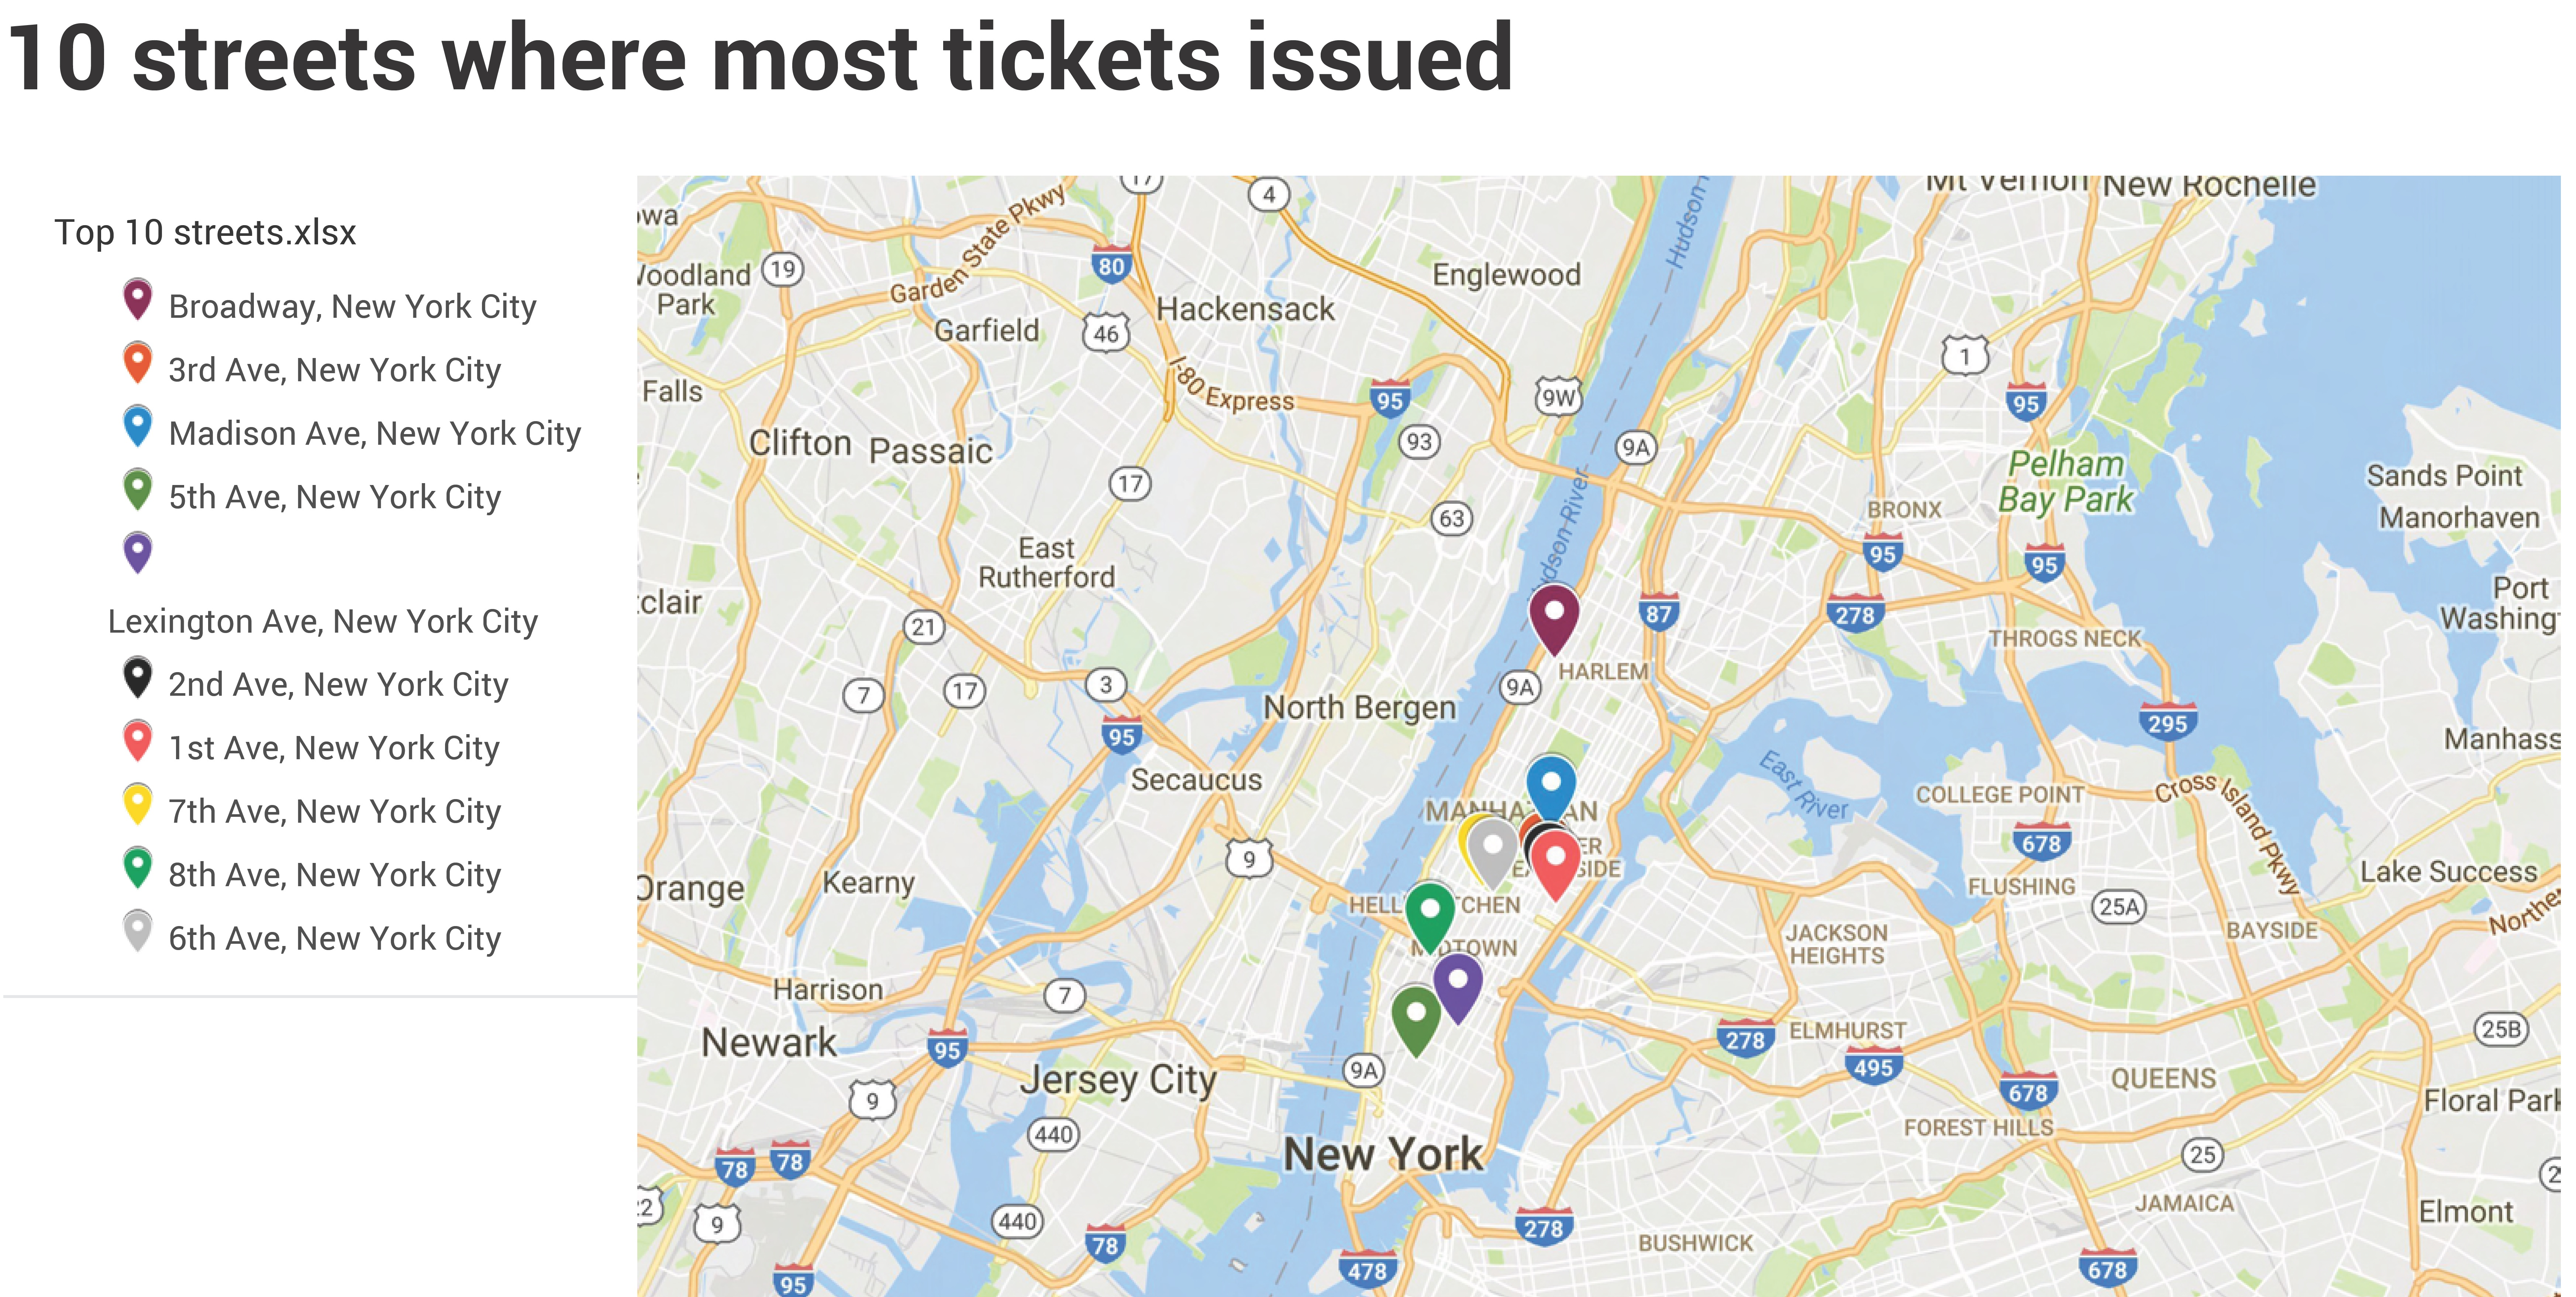

In [19]:
Image(filename="C:/Users/VT/Datacamp/10_most_ streets.jpg")

**This is surprising to realize that the most parking tickets were issued on the Manhattan island**, the most popular borough in New York City.  According to Wikipedia---"Among the world’s major commercial, financial and cultural centers, it’s the heart of “the Big Apple.” Its iconic sites include skyscrapers such as the Empire State Building, neon-lit Times Square and the theaters of Broadway." Most parking violations happened on the Broadway. 